In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json

In [2]:
#defining the necessary variables
#Download dataset here
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge
num_classes = 7 #(angry,disgust,fear,happy,sad,surprise,neutral)
batch_size = 256
epochs = 5

In [3]:
#Reading the dataset
with open("./fer2013/fer2013.csv") as f:
    content=f.readlines()
lines=np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [4]:
#Initizalizing the train and test set
x_train,y_train,x_test,y_test = [],[],[],[]
#Load the dataset to the train and test variables
for i in range(1,num_of_instances):
    try:
        emotion, img, usage=lines[i].split(",")
        val=img.split(" ")
        pixels=np.array(val, 'float32')
        emotion= keras.utils.to_categorical(emotion, num_classes)
        
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("", end="")

In [5]:
#Data transformation
x_train = np.array(x_train, 'float32')
x_test = np.array(x_test, 'float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
#Normalizing the images in test and train set
x_train/=255
x_test/=255
#Reshaping
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [6]:
#CNN to be compiled by rmsprop optimizer
model = tf.keras.models.Sequential([
    #Convolution Layer 1
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 2
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 3
    tf.keras.layers.Conv2D(128,(3,3),activation ='relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 4
    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Fully Connected Layer 1
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #Fully Connected Layer 2
    tf.keras.layers.Dense(64,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #Final Output layer
    tf.keras.layers.Dense(7,activation = 'softmax')
    ])

In [8]:
#Creating the checkpoint for saving the weights
from tensorflow.keras.callbacks import ModelCheckpoint
filepath='./weightab.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',factor = 0.1,patience = 7,verbose = 1,mode = 'max'),

In [9]:
#Compiling the model using rmsprop optimizer
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
#Training the model
history=model.fit(x_train, y_train,
                  epochs=50,
                  callbacks=checkpoint,
                  validation_data=(x_test,y_test))

Epoch 1/50
898/898 [==============================] - 76s 39ms/step - loss: 0.4890 - accuracy: 0.2352 - val_loss: 0.3528 - val_accuracy: 0.3642

Epoch 00001: saving model to .\weightab.hdf5
Epoch 2/50
898/898 [==============================] - 34s 37ms/step - loss: 0.3268 - accuracy: 0.4384 - val_loss: 0.2890 - val_accuracy: 0.4979

Epoch 00002: saving model to .\weightab.hdf5
Epoch 3/50
898/898 [==============================] - 34s 38ms/step - loss: 0.2986 - accuracy: 0.5088 - val_loss: 0.2768 - val_accuracy: 0.5347

Epoch 00003: saving model to .\weightab.hdf5
Epoch 4/50
898/898 [==============================] - 34s 38ms/step - loss: 0.2812 - accuracy: 0.5466 - val_loss: 0.2687 - val_accuracy: 0.5612

Epoch 00004: saving model to .\weightab.hdf5
Epoch 5/50
898/898 [==============================] - 34s 38ms/step - loss: 0.2691 - accuracy: 0.5823 - val_loss: 0.2593 - val_accuracy: 0.5748

Epoch 00005: saving model to .\weightab.hdf5
Epoch 6/50
898/898 [==============================

Epoch 44/50
898/898 [==============================] - 34s 38ms/step - loss: 0.0873 - accuracy: 0.9201 - val_loss: 0.3388 - val_accuracy: 0.6434

Epoch 00044: saving model to .\weightab.hdf5
Epoch 45/50
898/898 [==============================] - 35s 39ms/step - loss: 0.0844 - accuracy: 0.9254 - val_loss: 0.3201 - val_accuracy: 0.6339

Epoch 00045: saving model to .\weightab.hdf5
Epoch 46/50
898/898 [==============================] - 34s 38ms/step - loss: 0.0838 - accuracy: 0.9248 - val_loss: 0.3426 - val_accuracy: 0.6311

Epoch 00046: saving model to .\weightab.hdf5
Epoch 47/50
898/898 [==============================] - 34s 37ms/step - loss: 0.0832 - accuracy: 0.9263 - val_loss: 0.3285 - val_accuracy: 0.6414

Epoch 00047: saving model to .\weightab.hdf5
Epoch 48/50
898/898 [==============================] - 34s 38ms/step - loss: 0.0808 - accuracy: 0.9299 - val_loss: 0.3318 - val_accuracy: 0.6172

Epoch 00048: saving model to .\weightab.hdf5
Epoch 49/50
898/898 [========================

In [34]:
#CNN to be compiled by adam optimizer
modelad = tf.keras.models.Sequential([
    #Convolution Layer 1
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 2
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 3
    tf.keras.layers.Conv2D(128,(3,3),activation ='relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Convolution Layer 4
    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #Fully Connected Layer 1
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #Fully Connected Layer 2
    tf.keras.layers.Dense(64,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #Final Output layer
    tf.keras.layers.Dense(7,activation = 'softmax')
    ])

In [35]:
#Compiling the model using adam optimizer
modelad.compile(optimizer= 'adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
#Training the model
historyad=modelad.fit(x_train, y_train,
                  epochs=50,
                  validation_data=(x_test,y_test))

Epoch 1/50
898/898 [==============================] - 28s 29ms/step - loss: 0.4992 - accuracy: 0.2469 - val_loss: 0.3420 - val_accuracy: 0.3996
Epoch 2/50
898/898 [==============================] - 26s 29ms/step - loss: 0.3406 - accuracy: 0.4232 - val_loss: 0.2973 - val_accuracy: 0.4812
Epoch 3/50
898/898 [==============================] - 26s 29ms/step - loss: 0.3061 - accuracy: 0.4962 - val_loss: 0.2832 - val_accuracy: 0.5300
Epoch 4/50
898/898 [==============================] - 26s 29ms/step - loss: 0.2886 - accuracy: 0.5378 - val_loss: 0.2809 - val_accuracy: 0.5316
Epoch 5/50
898/898 [==============================] - 26s 29ms/step - loss: 0.2769 - accuracy: 0.5606 - val_loss: 0.2704 - val_accuracy: 0.5559
Epoch 6/50
898/898 [==============================] - 26s 29ms/step - loss: 0.2669 - accuracy: 0.5865 - val_loss: 0.2505 - val_accuracy: 0.5893
Epoch 7/50
898/898 [==============================] - 26s 29ms/step - loss: 0.2567 - accuracy: 0.6083 - val_loss: 0.2503 - val_accuracy:

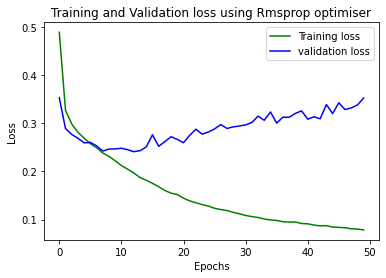

In [41]:
#Creating the graph for Training and Validation loss using Rmsprop optimiser
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss using Rmsprop optimiser')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

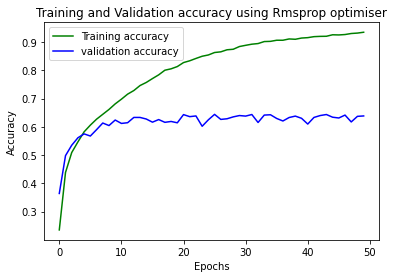

In [42]:
#Creating the graph for Training and Validation accuracy using Rmsprop optimiser
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy using Rmsprop optimiser')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

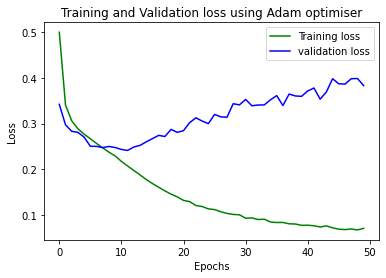

In [36]:
#Creating the graph for Training and Validation loss using Adam optimiser
loss_train = historyad.history['loss']
loss_val = historyad.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss using Adam optimiser')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

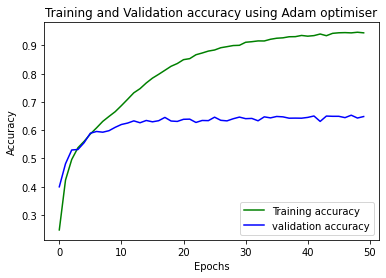

In [37]:
#Creating the graph for Training and Validation accuracy using Adam optimiser
loss_train = historyad.history['accuracy']
loss_val = historyad.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy using Adam optimiser')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
#Creating the Confusion Matrix
y_predicted = modelad.predict(x_test)
y_predicted=np.array(y_predicted,'float32')
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []
actual_list = []
 
for i in y_predicted: 
    pred_list.append(np.argmax(i))
for i in y_test: 
    actual_list.append(np.argmax(i))
cm = tf.math.confusion_matrix(labels=actual_list,predictions=pred_list)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[279,   0,  56,  22,  62,   5,  43],
       [ 17,  28,   4,   1,   5,   0,   1],
       [ 52,   1, 223,  14, 112,  33,  61],
       [ 20,   2,  24, 748,  26,  14,  61],
       [ 90,   1,  70,  24, 387,   8,  73],
       [  8,   1,  37,  12,  19, 323,  15],
       [ 61,   1,  32,  51, 119,   4, 339]])>

Text(69.0, 0.5, 'Truth')

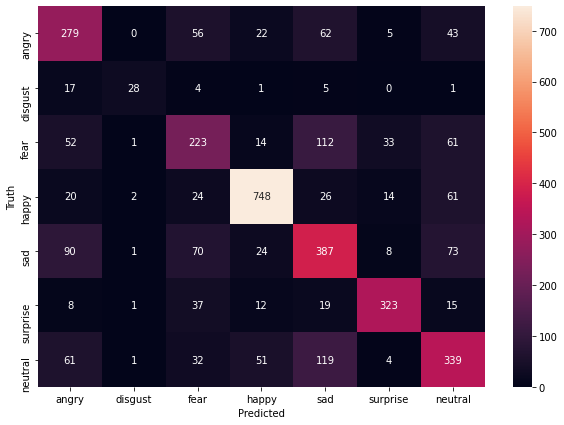

In [39]:
#Confusion matrix using seaborn for better visualization
import seaborn as sn
plt.figure(figsize = (10,7))
axis_label=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
sn.heatmap(cm,xticklabels=axis_label,yticklabels=axis_label,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
#Saving the model compiled using adam optimizer to disk
from tensorflow.keras.models import model_from_json
model_json = modelad.to_json()
with open("./modeladam.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./modeladam.h5")
print("Saved model to disk")

Saved model to disk
